In [1]:
'''most recent notebook 22/2/23. using utils_lef for function, removing R rows, '''
from util_lef import *
#import util
import os
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split ,cross_val_score, cross_validate
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import seaborn as sns
from feature_engine.selection import DropCorrelatedFeatures



In [2]:
#print('im now here:')
#print(os.getcwd())
dir1 = 'swell_data'
os.chdir(dir1)
# print('and now  here:')
# print(os.getcwd())


In [3]:

filename = 'Behavioral-features - per minute.csv'

faceReader_cols = ['PP', 'Blok', 'Condition','timestamp', 'Squality','Sneutral' ,\
                    'Shappy', 'Ssad', 'Sangry', 'Ssurprised', 'Sscared', 'Sdisgusted',\
                        'Svalence', 'SyHeadOrientation','SxHeadOrientation','SzHeadOrientation',\
                        'SmouthOpen','SleftEyeClosed','SrightEyeClosed','SleftEyebrowLowered',\
                        'SleftEyebrowRaised','SrightEyebrowLowered','SrightEyebrowRaised','SgazeDirectionForward','SgazeDirectionLeft','SgazeDirectionRight','SAu01_InnerBrowRaiser','SAu02_OuterBrowRaiser','SAu04_BrowLowerer','SAu05_UpperLidRaiser','SAu06_CheekRaiser','SAu07_LidTightener','SAu09_NoseWrinkler','SAu10_UpperLipRaiser','SAu12_LipCornerPuller','SAu14_Dimpler','SAu15_LipCornerDepressor','SAu17_ChinRaiser','SAu20_LipStretcher','SAu23_LipTightener','SAu24_LipPressor','SAu25_LipsPart','SAu26_JawDrop','SAu27_MouthStretch','SAu43_EyesClosed']
datadf = pd.read_csv(filename, usecols=faceReader_cols)
#print(df.head())
print(datadf.shape) #(3139, 45)


(3139, 45)


looking for NANs
PP                            0
Blok                          0
Condition                     0
timestamp                     0
Squality                    183
Sneutral                    183
Shappy                      183
Ssad                        183
Sangry                      183
Ssurprised                  183
Sscared                     183
Sdisgusted                  183
Svalence                    183
SyHeadOrientation           183
SxHeadOrientation           183
SzHeadOrientation           183
SmouthOpen                  183
SleftEyeClosed              183
SrightEyeClosed             183
SleftEyebrowLowered         183
SleftEyebrowRaised          183
SrightEyebrowLowered        183
SrightEyebrowRaised         183
SgazeDirectionForward       183
SgazeDirectionLeft          183
SgazeDirectionRight         183
SAu01_InnerBrowRaiser       183
SAu02_OuterBrowRaiser       183
SAu04_BrowLowerer           183
SAu05_UpperLidRaiser        183
SAu06_CheekRaiser      

/home/lefko/projects/stress_lef/util_lef.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), cmap="rocket_r")


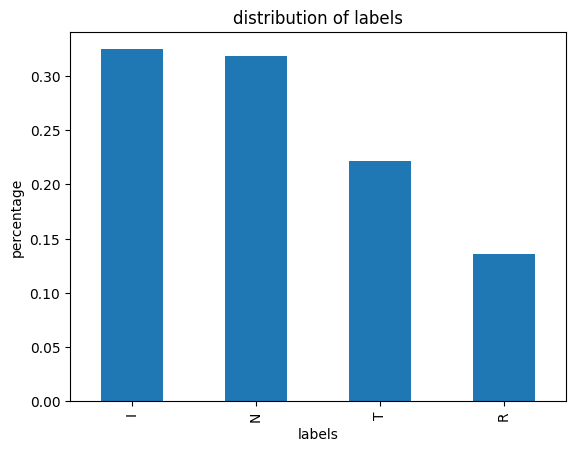

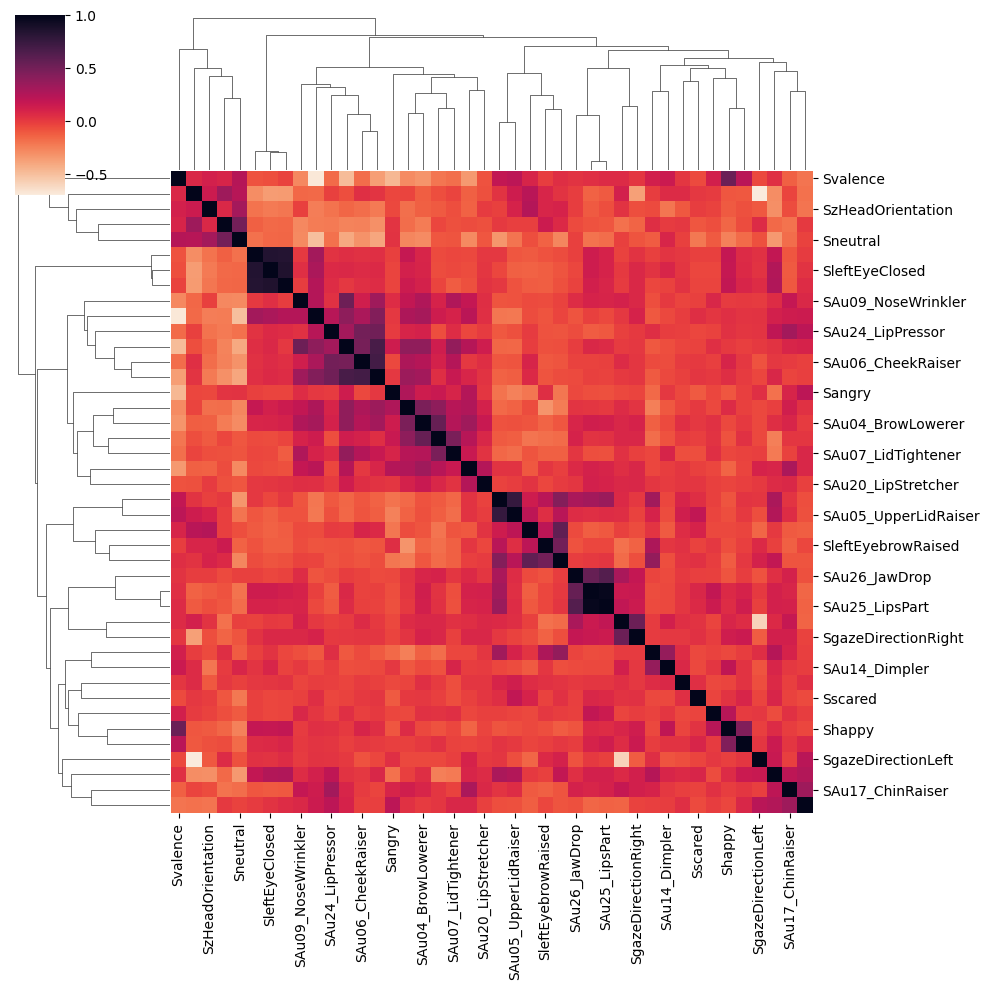

In [4]:
datadf = explore_df_fillNAs(datadf) #maybe drop r rows in here

In [5]:
df_corrFeat = replace_correlatedCols_with_their_mean(datadf)


dealing with correlated columns: {'SAu25_LipsPart', 'SmouthOpen'}
dealing with correlated columns: {'SAu43_EyesClosed', 'SleftEyeClosed', 'SrightEyeClosed'}


/tmp/ipykernel_3195/982078707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_corrFeat.corr(), cmap="rocket_r")


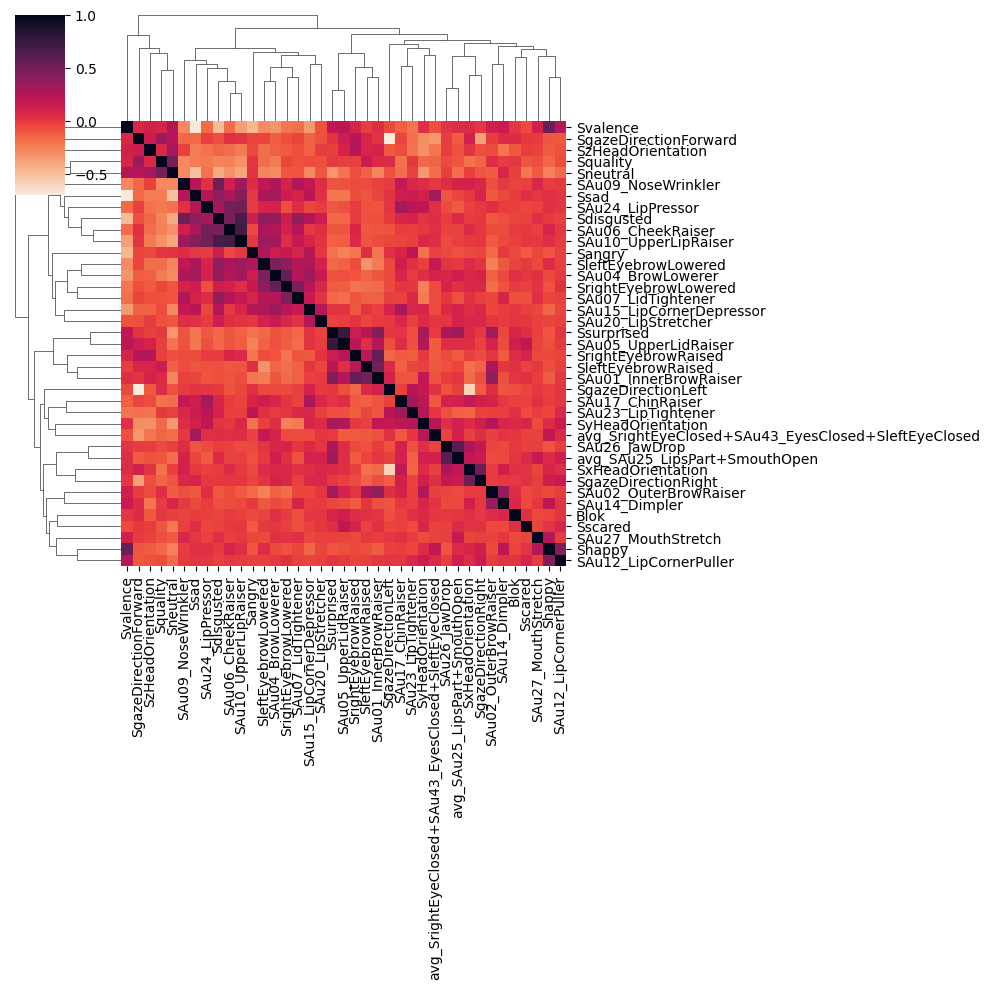

In [7]:

sns.clustermap(df_corrFeat.corr(), cmap="rocket_r")

In [ ]:
#checking stress distribution over time
#df2 = datadf.copy()
#df2['label_int'] = df2['Condition'].replace(["R","N", "I", "T"], [0, 1, 3, 3])
#df2.loc[df2['PP']=='1'].plot(x='timestamp', y='label_int') #only for 1 pp
#df2.groupby(by="PP").plot(x='timestamp', y='label_int') #plots each pp separately
#df2.groupby(by="PP")['label_int'].mean().plot() #this plots the mean of all laels per participant (1 pp-1value)

# regression prob, num labels

## binary

### unshuffled

original shape: (2956, 45)
number of R rows dropped: 401
changing labels to numerical - number classes= 2
dropping cols 2 drop
new shape: (2555, 41)
standardizing float columns (mean 0 and std 1)

 

[0.47804878 0.65365854 0.28780488 0.31219512 0.34313725 0.58333333
 0.29901961 0.3872549  0.42156863 0.5245098 ]
standard 10fold CV of SVM on shuffle=False data gives accuracy of 0.429053 +- 0.120608
labels are: {0, 1}
now training on full data and predicting on test set(never seen before)

 classification  report on full data (run only once!)
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       201
           1       0.62      0.65      0.64       310

    accuracy                           0.55       511
   macro avg       0.52      0.52      0.52       511
weighted avg       0.54      0.55      0.54       511


 confusion matrix on full data (run only once!)
[[ 76 125]
 [107 203]]


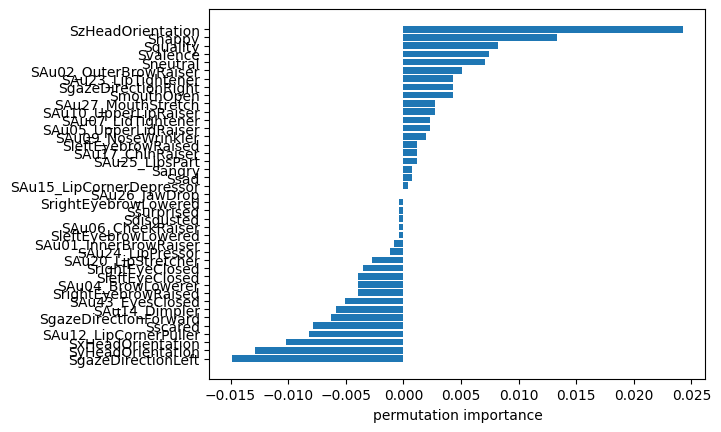


 feature importance in increasing order:
['SgazeDirectionLeft' 'SyHeadOrientation' 'SxHeadOrientation'
 'SAu12_LipCornerPuller' 'Sscared' 'SgazeDirectionForward' 'SAu14_Dimpler'
 'SAu43_EyesClosed' 'SrightEyebrowRaised' 'SAu04_BrowLowerer'
 'SleftEyeClosed' 'SrightEyeClosed' 'SAu20_LipStretcher'
 'SAu24_LipPressor' 'SAu01_InnerBrowRaiser' 'SleftEyebrowLowered'
 'SAu06_CheekRaiser' 'Sdisgusted' 'Ssurprised' 'SrightEyebrowLowered'
 'SAu26_JawDrop' 'SAu15_LipCornerDepressor' 'Ssad' 'Sangry'
 'SAu25_LipsPart' 'SAu17_ChinRaiser' 'SleftEyebrowRaised'
 'SAu09_NoseWrinkler' 'SAu05_UpperLidRaiser' 'SAu07_LidTightener'
 'SAu10_UpperLipRaiser' 'SAu27_MouthStretch' 'SmouthOpen'
 'SgazeDirectionRight' 'SAu23_LipTightener' 'SAu02_OuterBrowRaiser'
 'Sneutral' 'Svalence' 'Squality' 'Shappy' 'SzHeadOrientation']


In [8]:
dftrain2_unshuf, numLabels2_unshuf = prep_df_4regr(datadf, 'Condition', cols_2_drop=['Blok','PP', 'timestamp','Condition'], num_classes=2)
print('\n \n')
acc_unshuf, clf_unshuf = svm_cv( dftrain2, numLabels2, shuffle= False, trainOnFullData=True)

### shuffled

original shape: (2956, 45)
number of R rows dropped: 401
changing labels to numerical - number classes= 2
dropping cols 2 drop
new shape: (2555, 41)
standardizing float columns (mean 0 and std 1)

 

[0.72195122 0.75609756 0.73658537 0.74634146 0.73529412 0.78921569
 0.74509804 0.75980392 0.76470588 0.75980392]
standard 10fold CV of SVM on shuffle=True data gives accuracy of 0.751490 +- 0.017837
labels are: {0, 1}
now training on full data and predicting on test set(never seen before)

 classification  report on full data (run only once!)
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       175
           1       0.78      0.91      0.84       336

    accuracy                           0.77       511
   macro avg       0.76      0.71      0.72       511
weighted avg       0.77      0.77      0.76       511


 confusion matrix on full data (run only once!)
[[ 87  88]
 [ 29 307]]


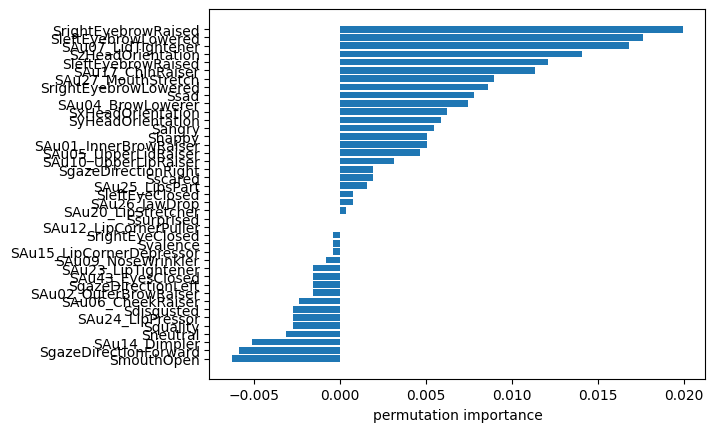


 feature importance in increasing order:
['SmouthOpen' 'SgazeDirectionForward' 'SAu14_Dimpler' 'Sneutral'
 'Squality' 'SAu24_LipPressor' 'Sdisgusted' 'SAu06_CheekRaiser'
 'SAu02_OuterBrowRaiser' 'SgazeDirectionLeft' 'SAu43_EyesClosed'
 'SAu23_LipTightener' 'SAu09_NoseWrinkler' 'SAu15_LipCornerDepressor'
 'Svalence' 'SrightEyeClosed' 'SAu12_LipCornerPuller' 'Ssurprised'
 'SAu20_LipStretcher' 'SAu26_JawDrop' 'SleftEyeClosed' 'SAu25_LipsPart'
 'Sscared' 'SgazeDirectionRight' 'SAu10_UpperLipRaiser'
 'SAu05_UpperLidRaiser' 'SAu01_InnerBrowRaiser' 'Shappy' 'Sangry'
 'SyHeadOrientation' 'SxHeadOrientation' 'SAu04_BrowLowerer' 'Ssad'
 'SrightEyebrowLowered' 'SAu27_MouthStretch' 'SAu17_ChinRaiser'
 'SleftEyebrowRaised' 'SzHeadOrientation' 'SAu07_LidTightener'
 'SleftEyebrowLowered' 'SrightEyebrowRaised']


In [9]:
dftrain2, numLabels2 = prep_df_4regr(datadf, 'Condition', cols_2_drop=['Blok','PP', 'timestamp','Condition'], num_classes=2)
print('\n \n')
acc_shuf, clf_shuf = svm_cv( dftrain2, numLabels2, shuffle= True, trainOnFullData=True)

# split by PP to do rolling window over each pp & blok

NameError: name 'df3' is not defined

In [16]:
def separate_pp(df):
    ### separated the data in base of person and blok [P=Person][B=Blok][1=data]
    split_df = []
    pp_df = list(df.groupby("PP"))
    #pp_df is a list of tuples. pp_df[0] is the first tuple
    #pp_df[0][0]: PP1(str) and pp_df[0][1]: data (df)
    for pp in pp_df:
        split_df.append(list(pp[1].groupby("Blok"))) #each blok has R and one more contition
    return split_df

In [33]:
type(split_lst[0][0][1])

pandas.core.frame.DataFrame

In [67]:
df3 = df_corrFeat.copy()
row_window = 2
feature = 'Sdisgusted'

#figure out where the below should go in the function..
df3 = df3.loc[df3['Condition'] !='R']
print('number of R rows dropped: '+str(df_corrFeat.shape[0]-df3.shape[0]))

#def make_Feature_rollingAvg_perPPnBlok_...........................................
split_lst = separate_pp(df3)

out_df=pd.DataFrame()

for pp_idx in range(len(split_lst)):
    for blok_idx in range(len(split_lst[pp_idx])):
        temp_df = split_lst[pp_idx][blok_idx][1] #maybe throw this in function that takes the df as input. ?returns the same part as out put or already the concated full output with rollings included?
        new_name = 'avg'+ str(row_window)+'rows_'+feature
        temp_df[new_name] = temp_df[feature].rolling(row_window).mean()
        #temp_df = temp_df.drop(feature, axis =1)
        out_df = pd.concat([out_df, temp_df], ignore_index=True)


        





number of R rows dropped: 401


In [58]:
out_df['Sdisgusted']

KeyError: 'Sdisgusted'

In [27]:
print(type(split_df[0][0][1]))


KeyError: 0

# trying stratified splitting

original shape: (2555, 44)
number of R rows dropped: 73
changing labels to numerical - number classes= 2
dropping cols 2 drop
new shape: (2482, 40)
standardizing float columns (mean 0 and std 1)
[0.77889447 0.73366834 0.77386935 0.76884422 0.74371859 0.72727273
 0.75757576 0.73232323 0.71212121 0.73737374]
standard 10fold CV of SVM -copyShuffleVar data gives accuracy of 0.746566 +- 0.021044
now training on full data and predicting on test set(never seen before). DOING THIS ONLY ONCE!

 classification  report on full data (run only once!)
              precision    recall  f1-score   support

           0       0.81      0.48      0.60       185
           1       0.75      0.94      0.83       312

    accuracy                           0.76       497
   macro avg       0.78      0.71      0.72       497
weighted avg       0.77      0.76      0.75       497


 confusion matrix on full data (run only once!)
[[ 88  97]
 [ 20 292]]


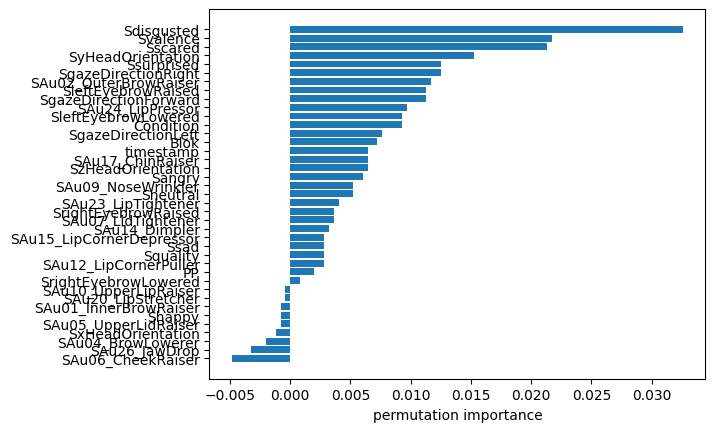


 feature importance in increasing order:
['SAu06_CheekRaiser' 'SAu26_JawDrop' 'SAu04_BrowLowerer'
 'SxHeadOrientation' 'SAu05_UpperLidRaiser' 'Shappy'
 'SAu01_InnerBrowRaiser' 'SAu20_LipStretcher' 'SAu10_UpperLipRaiser'
 'SrightEyebrowLowered' 'PP' 'SAu12_LipCornerPuller' 'Squality' 'Ssad'
 'SAu15_LipCornerDepressor' 'SAu14_Dimpler' 'SAu07_LidTightener'
 'SrightEyebrowRaised' 'SAu23_LipTightener' 'Sneutral'
 'SAu09_NoseWrinkler' 'Sangry' 'SzHeadOrientation' 'SAu17_ChinRaiser'
 'timestamp' 'Blok' 'SgazeDirectionLeft' 'Condition' 'SleftEyebrowLowered'
 'SAu24_LipPressor' 'SgazeDirectionForward' 'SleftEyebrowRaised'
 'SAu02_OuterBrowRaiser' 'SgazeDirectionRight' 'Ssurprised'
 'SyHeadOrientation' 'Sscared' 'Svalence' 'Sdisgusted']


In [68]:
def add_stratific_col(df):

        df['strat_col'] = df['Condition'].astype(str)+'_'+df['PP'].astype(str)+'_'\
                        +df['Blok'].astype(str)
        # print(len(df['strat_col'].unique()))
        # print(len(df['Condition'].unique()))
        # print(len(df['PP'].unique()))
        # print(len(df['Blok'].unique()))

        return df

#tryin stratified split based on PP + blok + label

#df = datadf.copy() #to see performance WO addressing correlated columns
# df = df_corrFeat.copy() #to see avg(correlated features) effect

#def svm_cv_stratified()
df = out_df.copy() #to see effect of rolling window on most impo feature

df = add_stratific_col(df)


dftrain, numLabels = prep_df_4regr(df, 'Condition', cols_2_drop=['Blok','PP', 'timestamp','Condition'], num_classes=2)

trainOnFullData = True
#from svm_cv funciton.....................................................
clf = svm.SVC(kernel='rbf', random_state=42)
x_train, x_test, y_train, y_test = train_test_split(dftrain, numLabels, test_size=0.20, shuffle=True, stratify=dftrain['strat_col'], random_state=42)

#need to drop strat_col from obth xtrain and x test BEFORE TRAINING. 
# #maybe dont even need to store them in dftrain
x_train = x_train.drop('strat_col', axis=1)
x_test =  x_test.drop('strat_col', axis =1)


scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)
print("standard 10fold CV of SVM -copyShuffleVar data gives accuracy of %f +- %f" %(scores.mean(), scores.std()))
#print('labels are: '+str(set(labels)))

if trainOnFullData:
        print('now training on full data and predicting on test set(never seen before). DOING THIS ONLY ONCE!')
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print('\n classification  report on full data (run only once!)')
        print(classification_report(y_test, y_pred))
        print('\n confusion matrix on full data (run only once!)')
        print(confusion_matrix(y_test, y_pred))

        #GETTING FEAUTRE IMPORTANCE OF (trained) SVM with rbf kernel:
        importance = permutation_importance(clf, x_test, y_test, random_state=42)
        sorted_idx = importance.importances_mean.argsort()
        plt.barh(np.array(df.columns)[sorted_idx], importance.importances_mean[sorted_idx])
        #plt.xticks(rotation=90)
        plt.xlabel('permutation importance')
        plt.show()
        print("\n feature importance in increasing order:")
        print(np.array(df.columns)[sorted_idx])





In [69]:
#out_df['Sdisgusted']
out_df.columns
dftrain.columns


Index(['Squality', 'Sneutral', 'Shappy', 'Ssad', 'Sangry', 'Ssurprised',
       'Sscared', 'Sdisgusted', 'Svalence', 'SyHeadOrientation',
       'SxHeadOrientation', 'SzHeadOrientation', 'SleftEyebrowLowered',
       'SleftEyebrowRaised', 'SrightEyebrowLowered', 'SrightEyebrowRaised',
       'SgazeDirectionForward', 'SgazeDirectionLeft', 'SgazeDirectionRight',
       'SAu01_InnerBrowRaiser', 'SAu02_OuterBrowRaiser', 'SAu04_BrowLowerer',
       'SAu05_UpperLidRaiser', 'SAu06_CheekRaiser', 'SAu07_LidTightener',
       'SAu09_NoseWrinkler', 'SAu10_UpperLipRaiser', 'SAu12_LipCornerPuller',
       'SAu14_Dimpler', 'SAu15_LipCornerDepressor', 'SAu17_ChinRaiser',
       'SAu20_LipStretcher', 'SAu23_LipTightener', 'SAu24_LipPressor',
       'SAu26_JawDrop', 'SAu27_MouthStretch', 'avg_SAu25_LipsPart+SmouthOpen',
       'avg_SAu43_EyesClosed+SleftEyeClosed+SrightEyeClosed',
       'avg2rows_Sdisgusted', 'strat_col'],
      dtype='object')